In [1]:
# Initialization

## Initialization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

import imageio.v2 as imageio

import ipywidgets as widgets
import numpy as np
import pandas as pd
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
import ipywidgets as widgets
from IPython.display import display, clear_output
from io import BytesIO

# Data demo 1

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create sliders for the data generation parameters and RANSAC settings
n_samples_slider = widgets.IntSlider(min=100, max=2000, value=1000, description='n_samples:')
n_outliers_slider = widgets.IntSlider(min=0, max=500, value=200, description='n_outliers:')
noise_slider = widgets.FloatSlider(min=0, max=50, value=10, description='noise:')
outlier_x_mean_slider = widgets.FloatSlider(min=-10, max=10, value=3, description='Outlier X Mean:')
outlier_x_std_slider = widgets.FloatSlider(min=0, max=5, value=0.5, description='Outlier X Std:')
outlier_y_mean_slider = widgets.FloatSlider(min=-50, max=50, value=-3, description='Outlier Y Mean:')
outlier_y_std_slider = widgets.FloatSlider(min=0, max=50, value=10, description='Outlier Y Std:')
ransac_residual_threshold_slider = widgets.FloatSlider(min=0, max=200, value=100, description='Residual Threshold:')

# Display the sliders
display(n_samples_slider, n_outliers_slider, noise_slider, outlier_x_mean_slider, outlier_x_std_slider, outlier_y_mean_slider, outlier_y_std_slider, ransac_residual_threshold_slider)

# Create an output widget to hold the plot
output = widgets.Output()
display(output)

residual_threshold = 42 # placeholder value
X, y, coef = None, None, None

# Function to update the plot based on the slider values
def update_plot(change=None):
    global X, y, coef
    with output:
        clear_output(wait=True)
        
        n_samples = n_samples_slider.value
        n_outliers = n_outliers_slider.value
        noise = noise_slider.value
        outlier_x_mean = outlier_x_mean_slider.value
        outlier_x_std = outlier_x_std_slider.value
        outlier_y_mean = outlier_y_mean_slider.value
        outlier_y_std = outlier_y_std_slider.value
        residual_threshold = ransac_residual_threshold_slider.value
        
        # Generate linear dataset
        X, y, coef = datasets.make_regression(
            n_samples=n_samples,
            n_features=1,
            n_informative=1,
            noise=noise,
            coef=True
        )

        # Add outlier data
        np.random.seed(0)
        X[:n_outliers] = outlier_x_mean + outlier_x_std * np.random.normal(size=(n_outliers, 1))
        y[:n_outliers] = outlier_y_mean + outlier_y_std * np.random.normal(size=n_outliers)

        # Fit line using all data
        lr = linear_model.LinearRegression()
        lr.fit(X, y)

        # Robustly fit linear model with RANSAC algorithm
        ransac = linear_model.RANSACRegressor(residual_threshold=residual_threshold)
        ransac.fit(X, y)

        inlier_mask = ransac.inlier_mask_
        outlier_mask = np.logical_not(inlier_mask)

        # Predict data of estimated models
        line_X = np.arange(X.min(), X.max())[:, np.newaxis]
        line_y = lr.predict(line_X)
        line_y_ransac = ransac.predict(line_X)

        # Compare estimated coefficients
        print("Estimated coefficients (true, linear regression, RANSAC):")
        print(coef, lr.coef_, ransac.estimator_.coef_)

        lw = 2
        plt.scatter(
            X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
        )
        plt.scatter(
            X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
        )
        plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
        plt.plot(
            line_X,
            line_y_ransac,
            color="cornflowerblue",
            linewidth=lw,
            label="RANSAC regressor",
        )
        plt.legend(loc="lower right")
        plt.xlabel("Input")
        plt.ylabel("Response")
        plt.show()

# Register the callback function to update the plot when the widget values change
n_samples_slider.observe(update_plot, 'value')
n_outliers_slider.observe(update_plot, 'value')
noise_slider.observe(update_plot, 'value')
outlier_x_mean_slider.observe(update_plot, 'value')
outlier_x_std_slider.observe(update_plot, 'value')
outlier_y_mean_slider.observe(update_plot, 'value')
outlier_y_std_slider.observe(update_plot, 'value')
ransac_residual_threshold_slider.observe(update_plot, 'value')

# Initial plot
update_plot()


IntSlider(value=1000, description='n_samples:', max=2000, min=100)

IntSlider(value=200, description='n_outliers:', max=500)

FloatSlider(value=10.0, description='noise:', max=50.0)

FloatSlider(value=3.0, description='Outlier X Mean:', max=10.0, min=-10.0)

FloatSlider(value=0.5, description='Outlier X Std:', max=5.0)

FloatSlider(value=-3.0, description='Outlier Y Mean:', max=50.0, min=-50.0)

FloatSlider(value=10.0, description='Outlier Y Std:', max=50.0)

FloatSlider(value=100.0, description='Residual Threshold:', max=200.0)

Output()

In [4]:
# Initialize the best fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_best_fit = lr.predict(line_X)
best_score = lr.score(X, y)

# Perform 10 RANSAC iterations and save plots
n_iterations = 10
frames = []

for iteration in range(n_iterations):
    ransac = linear_model.RANSACRegressor(max_trials=iteration+1, residual_threshold=residual_threshold)
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_y_ransac = ransac.predict(line_X)
    
    # Update the best fit line if the current model has a better score
    current_score = ransac.score(X[inlier_mask], y[inlier_mask])
    if current_score > best_score:
        best_score = current_score
        line_y_best_fit = line_y_ransac

    # Create plot
    plt.figure()
    plt.scatter(X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
    plt.scatter(X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers")
    plt.plot(line_X, line_y_best_fit, color="gray", linewidth=2, linestyle='--', label="Best fit line")
    plt.plot(line_X, line_y_ransac, color="cornflowerblue", linewidth=2, label="RANSAC regressor")
    
    plt.legend(loc="lower right")
    plt.xlabel("Input")
    plt.ylabel("Response")
    plt.title(f"RANSAC Iteration {iteration + 1}")

    # Save plot to a BytesIO object
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    frames.append(imageio.imread(buf))
    buf.close()
    plt.close()

# Create GIF from frames
imageio.mimsave('ransac_bast_and_current.gif', frames, fps=1)

print("GIF created successfully!")

GIF created successfully!


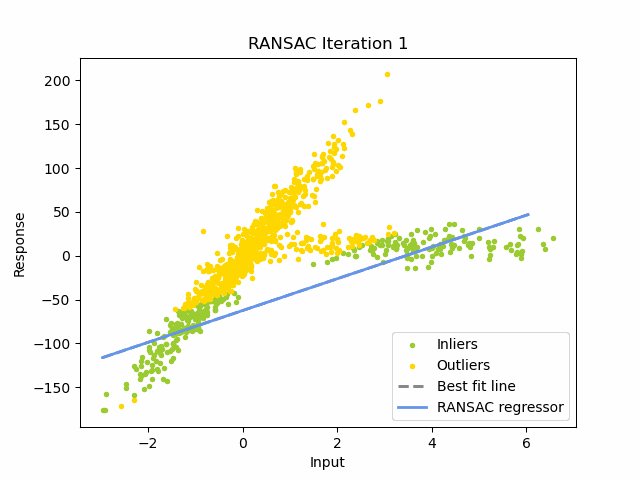

In [5]:
from IPython.display import Image

# Display the GIF
display(Image(filename='ransac_bast_and_current.gif'))

## Demo with "Mapping score" of the space with RANSAC iterations

Observe that mapping is discrete, we cannot reach most of positions

In [6]:
import imageio.v2 as imageio
from matplotlib.colors import Normalize
from tqdm import tqdm

# Initialize the best fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_best_fit = lr.predict(line_X)
best_score = lr.score(X, y)

# Perform 10 RANSAC iterations and save plots
n_iterations = 100
frames = []
scores = []
old_lines = []
cmap = plt.colormaps['viridis']

for iteration in tqdm(range(n_iterations)):
    ransac = linear_model.RANSACRegressor(max_trials=iteration+1, residual_threshold=30)
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_y_ransac = ransac.predict(line_X)
    
    # Update the best fit line if the current model has a better score
    current_score = ransac.score(X[inlier_mask], y[inlier_mask])
    scores.append(current_score)
    if current_score > best_score:
        best_score = current_score
        line_y_best_fit = line_y_ransac

    #TODO: keep scores sorted, uses something like insertion sort or cpp::set

    # Normalize the scores for color mapping
    norm = Normalize(vmin=min(scores), vmax=max(scores))

    # for iteration, current_score in enumerate(scores):
    # Create plot
    plt.figure()
    plt.scatter(X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
    plt.scatter(X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers")
    plt.plot(line_X, line_y_best_fit, color="black", linewidth=3, linestyle='--', label="Best fit line")
    for i, old_line in enumerate(old_lines):
        plt.plot(line_X, old_line, color=cmap(norm(scores[i])), linewidth=1, linestyle='-')

    plt.plot(line_X, line_y_ransac, color="cornflowerblue", linewidth=2, label="RANSAC regressor")
    
    plt.legend(loc="lower right")
    plt.xlabel("Input")
    plt.ylabel("Response")
    plt.title(f"RANSAC Iteration {iteration + 1}")

    old_lines.append(line_y_ransac)

    # Save plot to a BytesIO object
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    frames.append(imageio.imread(buf))
    buf.close()
    plt.close()

# Create GIF from frames
# TODO: get idea how to make transparent lines
imageio.mimsave('ransac_all_iterations.gif', frames, fps=10)

print("GIF created successfully!")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:16<00:00,  6.16it/s]


GIF created successfully!


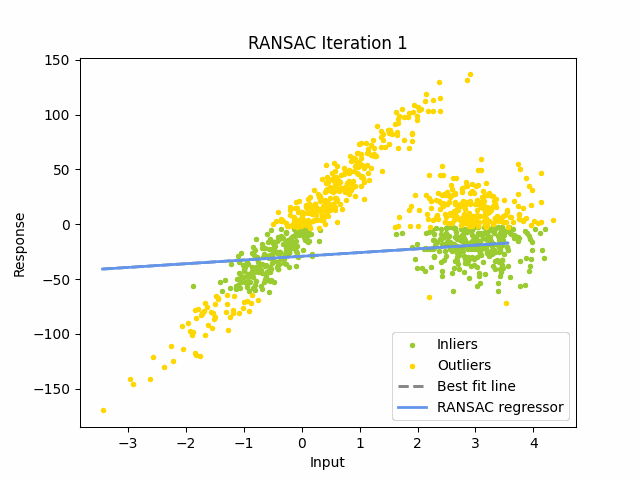

In [7]:
from IPython.display import Image

# Display the GIF
display(Image(filename='ransac_iterations.gif'))


# IRLS - Iterative reweighed least squares

In [26]:

# Define M-estimator base class
class MEstimator:
    def __init__(self, delta=1.0):
        self.delta = delta

    def kernel(self, u):
        raise NotImplementedError

    def weight(self, residuals):
        raise NotImplementedError

# Huber estimator
class Huber(MEstimator):
    def kernel(self, u):
        return np.where(np.abs(u) <= self.delta, u**2 / 2, self.delta * (np.abs(u) - self.delta / 2))

    def weight(self, residuals):
        return np.where(np.abs(residuals) <= self.delta, 1, self.delta / np.abs(residuals))

# Tukey estimator
class Tukey(MEstimator):
    def kernel(self, u):
        return np.where(np.abs(u) <= self.delta, (self.delta**2 / 6) * (1 - (1 - (u / self.delta)**2)**3), self.delta**2 / 6)

    def weight(self, residuals):
        return np.where(np.abs(residuals) <= self.delta, (1 - (residuals / self.delta)**2)**2, 0)

# Truncated Least Squares estimator
class TruncatedLeastSquares(MEstimator):
    def kernel(self, u):
        return np.where(np.abs(u) <= self.delta, u**2 / 2, 0)

    def weight(self, residuals):
        return np.where(np.abs(residuals) <= self.delta, 1, 0)

In [27]:
def irls_visualization(X, y, beta, w, iteration, frames):
    line_y = X @ beta
    
    # Create plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 1], y, c=w, cmap='viridis', marker=".", label="Data")
    ax.plot(X[:, 1], line_y, color="cornflowerblue", linewidth=2, label="IRLS fit")
    fig.colorbar(scatter, label='Weight')
    ax.legend(loc="lower right")
    ax.set_xlabel("Input")
    ax.set_ylabel("Response")
    ax.set_title(f"IRLS Iteration {iteration + 1}\nBeta: {beta}")

    # TODO: use this in all places!
    # Save plot to a BytesIO object
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close(fig)

# IRLS algorithm
def irls(X, y, max_iter=100, tol=1e-3, estimator=Huber(), delta=1.0):
    m, n = X.shape
    w = np.ones(m)
    beta = np.zeros(n + 1)
    frames = []
    X = np.hstack([np.ones((m, 1)), X])  # add intercept
    beta_prev = beta.copy()
    for iteration in range(max_iter):
        W = np.diag(w)
        # Solve weighted least squares problem (ordinary least squares residuals with weights)
        beta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
        residuals = y - X @ beta
        w = estimator.weight(residuals)
        w = w / np.max(w)  # normalize weights

        # Visualization
        irls_visualization(X, y, beta, w, iteration, frames)

        if np.linalg.norm(beta - beta_prev) < tol:
            break

        beta_prev = beta.copy()
        
    return beta, frames

# Perform IRLS with M-estimator
estimator = TruncatedLeastSquares(delta=40.0)
beta, frames = irls(X, y, max_iter=30, tol=1e-1, estimator=estimator)

# Create GIF from frames
if frames:
    imageio.mimsave('irls_iterations.gif', frames, fps=5)

print("GIF created successfully!")


/tmp/ipykernel_20254/994316555.py:17: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


GIF created successfully!


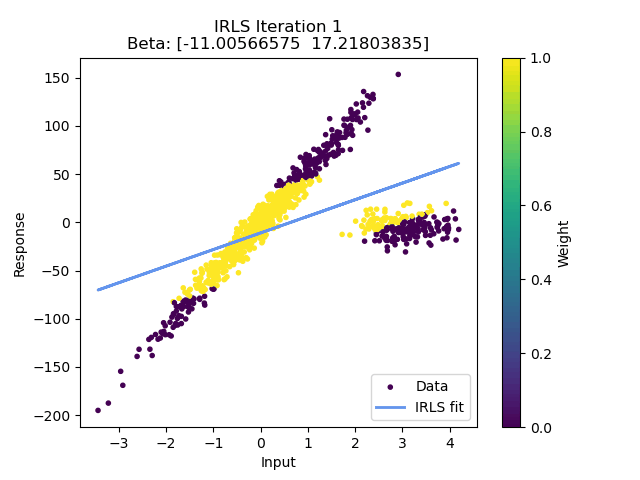

In [29]:
from IPython.display import Image

# Display the GIF
display(Image(filename='irls_iterations.gif'))

# TODO: add option to provide initialization of parameters to IRLS
# TODO: add outlier threshold update policy
# TODO: replace ordinary least squares solution with the template solution
# TODO: replace each element with callable

# TODO: Add combination of RANSAC + IRLS
# TODO: Compute the cost function and the "speed" proxy